## <font color='red'>#STOPWAR</font>

#### Блокнот лучше смотреть на nbviewer здесь => https://nbviewer.org/github/DmitryShuvalov/ml-intro_6-f-eng-sel/blob/main/homework.ipynb

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    
    if not auto_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()
    
def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [4]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

# Homework

## Exercise  1 - Scaling (2 points)

Perform standardization for wine dataset (`wine_data`) using only basic python, numpy and pandas (without using `StandardScaler` and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with `StandardScaler`.

**NOTE:**

- 1 point for functional version, 2 points for implementing scaling as sklearn pipeline compartible class. 
- Maximum for the exercise is 2 points.


### Simple version (1 point)

In [5]:
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
# 1 point
def scale(X):
    # your code here
    return (X-X.mean())/X.std(ddof=0)

In [7]:
assert np.allclose(np.array(scale(wine_data)), StandardScaler().fit_transform(wine_data))

### Pipeline Version (2 points)

In [8]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, copy=True, with_mean=True, with_std=True):
        # your code here
        self.copy_ = copy
        self.with_mean_ = with_mean
        self.with_std_ = with_std
        self.copy_ = copy 


    def fit(self, X, y=None):
        # your code here
        self.X_ = X
        self.y = y
        return self

    def transform(self, X, y=None, copy=None):
        # your code here
        if self.copy_:
            X=X.copy()
            
        X= (X-X.mean() if self.with_mean_ else X)
        X = X/X.std(ddof=0) if self.with_std_ else X
        
        return X

In [9]:
assert np.allclose(CustomScaler().fit_transform(wine_data), StandardScaler().fit_transform(wine_data))

## Exercise  2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [10]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])

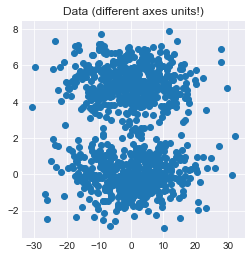

In [11]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

**NOTE:** on the plot above axes are scaled differently and we can clearly see two potential *classes/clusters*. In fact `matplotlib` performed `autoscaling` (which is basically can be considered as `MinMaxScaling` of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

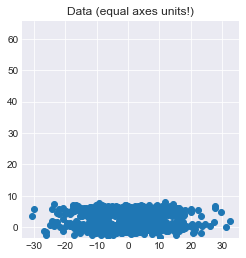

In [12]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False, title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform `StandardScaling` and `MinMaxScaling` of original data; visualize results for each case (**use `plot_scatter` with `auto_scaled=False`**):

### MinMaxScaling (0.5 point)

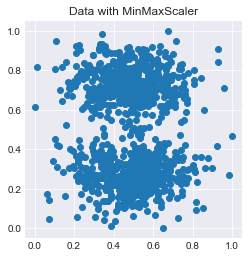

In [13]:
## your code
data_min_max_sc=MinMaxScaler().fit_transform(data)
plot_scatter(data_min_max_sc[:, 0], data_min_max_sc[:, 1], auto_scaled=False, title='Data with MinMaxScaler')

### StandardScaler (0.5 point)

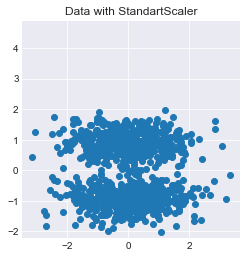

In [14]:
## your code
data_standart_sc=StandardScaler().fit_transform(data)
plot_scatter(data_standart_sc[:, 0], data_standart_sc[:, 1], auto_scaled=False, title='Data with StandartScaler')


### (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm [K-means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) using `data` generated above.

**NOTE:** basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data    
2) run algorithm (with k=2) on scaled data    
3) plot results: highlight different clusters using different colors.

You can use this [question](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering/89813) as a hint, but I recommend you to plot results using `plot_scatter` with `equal_scaled=True`: it might help you to intuitively understand the reasons of such scaling impact.


Для наглядности буду строить графики с auto_scaled=True


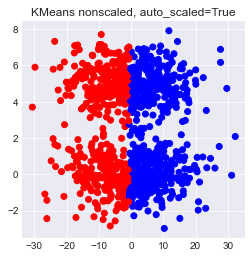

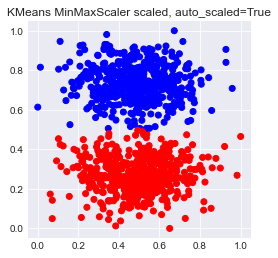

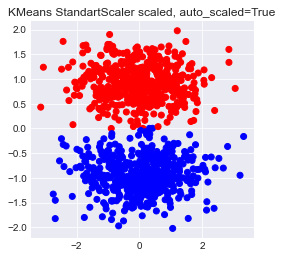

На всякий пожарный с equal_scaled=True (auto_scaled=False)


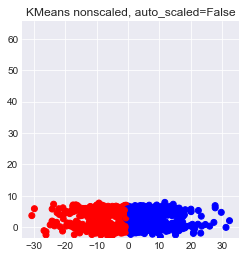

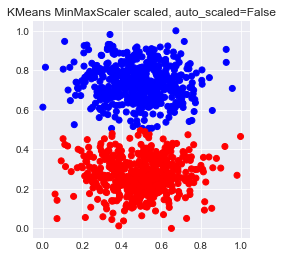

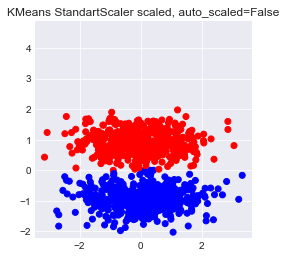

In [15]:
## your code
from sklearn.cluster import KMeans
KMeans_nonscaled = KMeans(n_clusters=2).fit(data)
KMeans_minmax_scaled= KMeans(n_clusters=2).fit(data_min_max_sc)
KMeans_std_scaled= KMeans(n_clusters=2).fit(data_standart_sc)

print('Для наглядности буду строить графики с auto_scaled=True')
plot_scatter(data[:, 0], data[:, 1], 
             auto_scaled=True, clusters=KMeans_nonscaled.labels_, title='KMeans nonscaled, auto_scaled=True')

plot_scatter(data_min_max_sc[:, 0], data_min_max_sc[:, 1], 
             auto_scaled=True,  clusters=KMeans_minmax_scaled.labels_, title='KMeans MinMaxScaler scaled, auto_scaled=True')

plot_scatter(data_standart_sc[:, 0], data_standart_sc[:, 1], 
             auto_scaled=True,  clusters=KMeans_std_scaled.labels_, title='KMeans StandartScaler scaled, auto_scaled=True')

print('На всякий пожарный с equal_scaled=True (auto_scaled=False)')
plot_scatter(data[:, 0], data[:, 1], 
             auto_scaled=False, clusters=KMeans_nonscaled.labels_, title='KMeans nonscaled, auto_scaled=False')

plot_scatter(data_min_max_sc[:, 0], data_min_max_sc[:, 1], 
             auto_scaled=False,  clusters=KMeans_minmax_scaled.labels_, title='KMeans MinMaxScaler scaled, auto_scaled=False')

plot_scatter(data_standart_sc[:, 0], data_standart_sc[:, 1], 
             auto_scaled=False,  clusters=KMeans_std_scaled.labels_, title='KMeans StandartScaler scaled, auto_scaled=False')


## Exercise  3 - Preprocessing Pipeline (2 points)

In [16]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data, wine_labels, 
                                                                            test_size=0.3, random_state=42)

Train model (for example, `LogisticRegression(solver='liblinear', penalty='l1')` on raw `wine_train` data; then train same model after data scaling; then add feature selection (and train model again on scaled data). For each experiment all required preprocessing steps (if any) should be wrapped into sklearn pipeline.

Measure `accuracy` of all 3 approaches on `wine_val` dataset. Describe and explain results.

In [17]:
## your code
from sklearn import set_config
from sklearn.metrics import plot_confusion_matrix, accuracy_score

set_config(display="diagram")

def preproc(scaler = None, selection_model = None):
    res = []
    if not (scaler is None):
        res.append(('scaler', scaler))
    if not (selection_model is None) :
        #Здесь использовал ещё RFECV и SequentialFeatureSelector. 
        #  Для RFECV - результат тот же, для SequentialFeatureSelector - результат хуже
        #  SelectFromModel - самый быстрый и самый "улучшающий", поэтому оставляем его
        res.append(('selector', SelectFromModel(selection_model))) 
        
        
    res.append(('model', LogisticRegression(solver='liblinear', penalty='l1')))
    return Pipeline(res)

def fit_evaluate(clf, X_train, y_train, X_test, y_test, plot_conf_matrix = True):
    clf.fit(X_train, y_train)
    if plot_conf_matrix:
        disp = plot_confusion_matrix(clf, X_test, y_test, normalize='true')
        disp.figure_.suptitle("Confusion Matrix")
        plt.show()
    
    return accuracy_score(y_pred=clf.predict(X_train), y_true=y_train), \
           accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

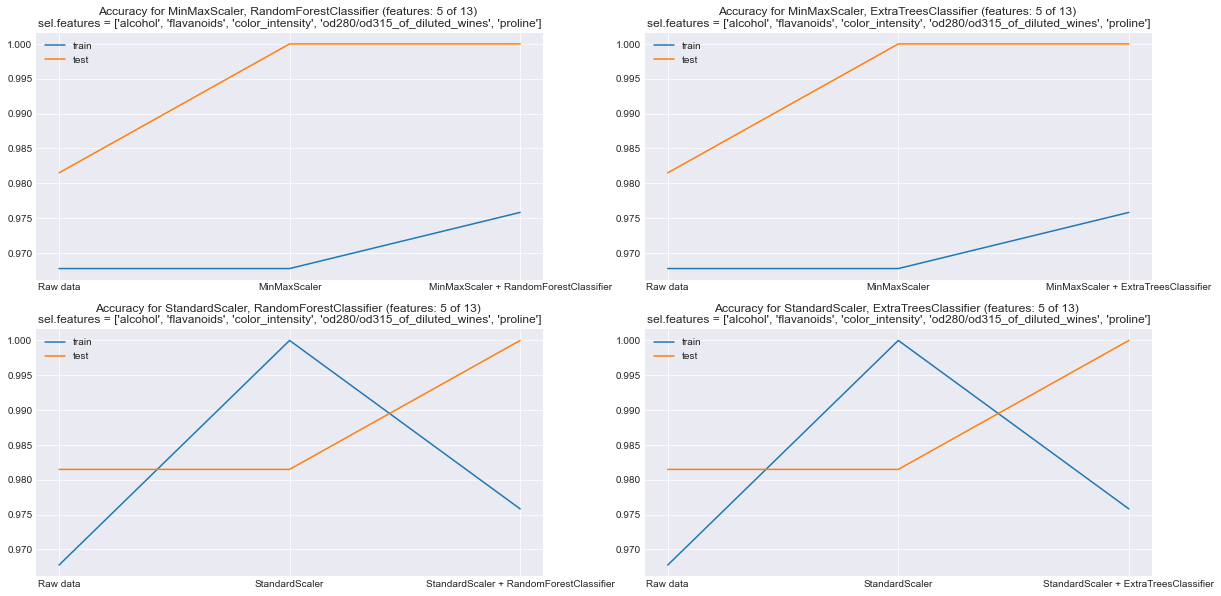

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

f, ax = plt.subplots(2,2,figsize=(20,10))
i, j = -1, -1
scalers = [MinMaxScaler(), StandardScaler()]
scalers_txt = ['MinMaxScaler', 'StandardScaler']
selection_models = [RandomForestClassifier(random_state=99), ExtraTreesClassifier(random_state=99)]
selection_models_txt = ['RandomForestClassifier', 'ExtraTreesClassifier']


for scal in scalers:
    i+=1
    j=-1
    for selection_model in selection_models:
        j+=1
        model1 = preproc()
        model_sc = preproc(scaler=scal)
        model_sel_sc = preproc(scaler=scal, selection_model=selection_model)
        train_acc_list, test_acc_list = [], []
        train_acc, test_acc = fit_evaluate(model1, wine_train, wine_labels_train, wine_val,  wine_labels_val, plot_conf_matrix=False)
        train_acc_list.append(train_acc); test_acc_list.append(test_acc)
        train_acc, test_acc = fit_evaluate(model_sc, wine_train, wine_labels_train, wine_val,  wine_labels_val, plot_conf_matrix=False)
        train_acc_list.append(train_acc); test_acc_list.append(test_acc)
        train_acc, test_acc = fit_evaluate(model_sel_sc, wine_train, wine_labels_train, wine_val,  wine_labels_val, plot_conf_matrix=False)
        train_acc_list.append(train_acc); test_acc_list.append(test_acc)
        x_list = ['Raw data', scalers_txt[i] ,f'{scalers_txt[i]} + {selection_models_txt[j]}']
        ax[i,j].plot(x_list, train_acc_list, label='train') 
        ax[i,j].plot(x_list, test_acc_list, label='test') 
        columns = wine_train.columns[model_sel_sc['selector'].get_support()].tolist()
        columns = f'{columns}'
        ax[i,j].title.set_text(f'Accuracy for {scalers_txt[i]}, ' +
                               f'{selection_models_txt[j]} '+
                               f'(features: {model_sel_sc["model"].n_features_in_} of {model1["model"].n_features_in_}) \n'+
                               f'sel.features = {columns}') 
        ax[i,j].legend()

plt.show()

###### <font color='red'>Мои мысли</font>
* При использовании скалирования логистическая регрессия не всегда улучшает accuracy. Но при использовании scaling+feature selection (из базовых sklearn) улучшение на проверном датасете очевидно
* При этом надо отметить, что на train датасете результат после feature selection может ухудшаться, что тоже понятно, так как мы выбрасываем некоторые свойства.
* Также нужно заметить, что оба выбранных классификаторов RandomForestClassifier и ExtraTreesClassifier выбрали одни и те же features. Поэтому и результат логистической регрессии оказался одинаковым.


## Exercise 4 - manual PCA (5 points)
The task is to solve PCA as an optimization problem, without explicitly doing eigen value decomposition.
In the most general setting PCA is minimization of reconstruction error of a projection of given rank $q$

$$\min_{\mu, \lambda_1,\ldots, \lambda_n, \mathbf{V}_q} \sum_{i=1}^n ||x_i - \mu - \mathbf{V}_q \lambda_i||^2$$

With a number of steps that can be found here https://stats.stackexchange.com/a/10260 this task transforms to
 $$\max_{u_i} \sum_{i=1}^q u_i^T \mathbf{S} u_i$$
 where $\mathbf{S}$ is the sample covariance matrix (after standartization) and $u_1, \ldots, u_q$ are the $q$ are orthonormal columns in $\mathbf{V}_q$.
 Let us solve this optimization problem with `scipy.optimize` library.
 
 Additional 2 point are given for visualization of the results.

### PCA (3 points)

In [19]:
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

Find a covariance matrix of standartized data and assing it to S.

In [20]:
## your code

w_data_std = (wine_data - wine_data.mean())/wine_data.std(ddof=0)

S = np.cov(w_data_std, rowvar=False)# (w_data_std.T @ w_data_std)/(w_data_std.shape[0]-1)## your code

In [21]:
assert np.allclose(np.linalg.norm(S), 5.787241159764733)

In [22]:
#Строим собственные вектора и их величинами. Сортируем их
# каждое значение 'values' должно быть равно максимум x_i@S@x_i  из следующих шагов
# ОБРАТИТЕ ВНИМАНИЕ НА ПЕРВЫЕ ДВА ЗНАЧЕНИЯ 
S_eig = pd.DataFrame({'values': np.linalg.eig(S)[0].tolist(), 'vectors': np.linalg.eig(S)[1].tolist()})

#S_eig = S_eig.sort_values('values', ascending=False).reset_index() # по порядку значимости
S_eig = S_eig # по порядку свойств

print('Eeigenvalues and eigenvectors (собственные значения и собственные вектора)')
print(S_eig.head(2))
print('')
print("Прогноз:")
for i in range(2):
    print(f'x{i}@S@x{i} должен быть равень {S_eig["values"][i]}')


Eeigenvalues and eigenvectors (собственные значения и собственные вектора)
     values                                            vectors
0  4.732437  [-0.1443293954060112, 0.4836515478172144, 0.20...
1  2.511081  [0.24518758025722065, 0.22493093462784436, -0....

Прогноз:
x0@S@x0 должен быть равень 4.7324369775835935
x1@S@x1 должен быть равень 2.5110809296451286


In [23]:
from scipy.optimize import minimize
def objective(x):
    # your code: write objective of the problem (don't forget that scipy does min while we need max)
    return -(x.T @ S @ x)
    
def norm_constraint(x):
    # your code: constaraint norm of x to be 1, function should return 0 if constraint holds    
    return np.linalg.norm(x)-1

con1 = {'type': 'eq', 'fun': norm_constraint}

x0 = np.full(13,0) #Можно брать любой вектор. Разница будет только в количестве итераций

sol = minimize(objective, 
               x0, 
               constraints = [con1]
              )
x0 = sol.x
print(f'x0@sS@s0 = {x0@S@x0}')

x0@sS@s0 = 4.732437120117142


In [24]:
print(f'x0 = {x0}')

x0 = [ 0.14432376 -0.24517849 -0.00205898 -0.23935441  0.14199171  0.39465096
  0.42292699 -0.29851411  0.31345346 -0.08862293  0.29671479  0.37615862
  0.28676195]


Hurray! We have first vector! Let's do another one.

In [25]:
def orthogonality_constraint(x):
    # your code: x should be orthogonal to x0, function should return 0 if constraint holds
    return (x0 @ x)

con2 = {'type': 'eq', 'fun': orthogonality_constraint}

#x1 = S_eig['vectors'][1]# your code: initial vector to start optimization
x1=np.full(13,0)

sol = minimize(objective, 
               x1, 
               constraints = [con1, con2] #your code
              )

x1 = sol.x
print(f'x1@sS@s1 = {x1@S@x1}')

x1@sS@s1 = 2.511080943105644


In [26]:
print(f'x1 = {x1}')

x1 = [ 0.48365338  0.22493138  0.3160855  -0.01057997  0.29962584  0.06504717
 -0.00335841  0.02878169  0.03929695  0.52998502 -0.27923643 -0.16449421
  0.36490707]


If your solution is correct, the following asserts should be Ok.

In [27]:
assert np.allclose(x0@S@x0, 4.732436977583595)
assert np.allclose(x1@S@x1, 2.5110809296451233)

### Visualization (2 points)

Visualize the points after applying custom dimension reduction with 2 components.

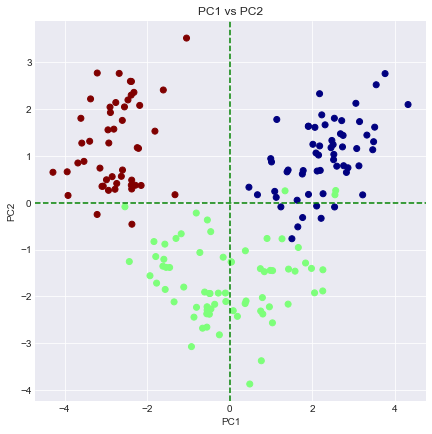

In [28]:
X0 = w_data_std @ x0
X1 = w_data_std @ x1

plt.figure(figsize=(7,7))
plt.scatter(X0, X1, c=wine_labels, cmap='jet') #auto_scaled=True,  clusters=KMeans_std_scaled.labels_, title='KMeans StandartScaler scaled')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'PC1 vs PC2')
plt.axhline(0,  color = 'g', linestyle = 'dashed')
plt.axvline(0,  color = 'g', linestyle = 'dashed')
plt.show()

**Сравним с библиотечным PCA**

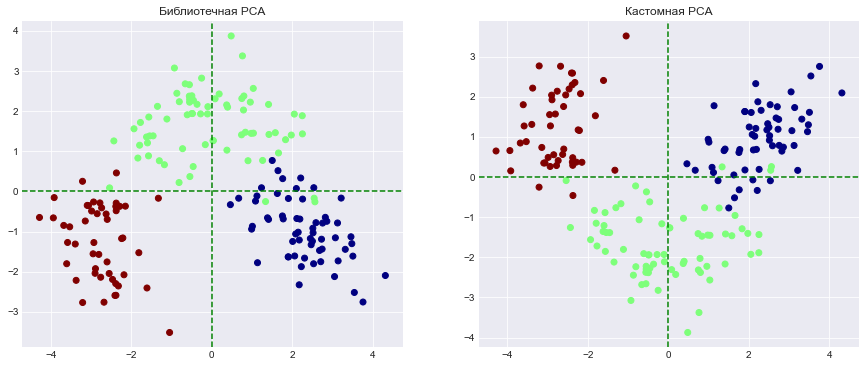

Видим симместричность относительно горизонтальной оси.
Отразим кастомную относительно горизонтальной оси и наложим сверху библиотечную


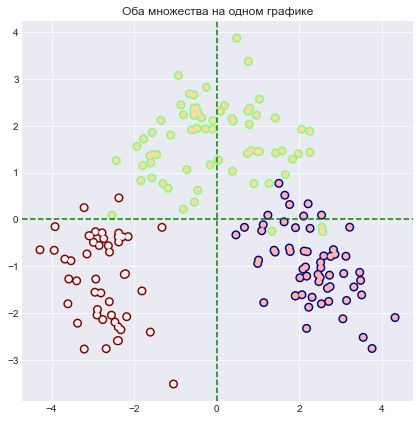

In [29]:
#from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(w_data_std)

f, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].scatter(Xt[:,0], Xt[:,1], c=wine_labels, cmap='jet') 
ax[0].axhline(0,  color = 'g', linestyle = 'dashed')
ax[0].axvline(0,  color = 'g', linestyle = 'dashed')
ax[0].title.set_text(f'Библиотечная PCA') 

ax[1].scatter(X0, X1, c=wine_labels, cmap='jet') 
ax[1].axhline(0,  color = 'g', linestyle = 'dashed')
ax[1].axvline(0,  color = 'g', linestyle = 'dashed')
ax[1].title.set_text(f'Кастомная PCA') 
plt.show()

print('Видим симместричность относительно горизонтальной оси.') 
print('Отразим кастомную относительно горизонтальной оси и наложим сверху библиотечную')
plt.figure(figsize=(7,7))
plt.scatter(X0, -X1, c=wine_labels, cmap='jet', linewidths=3) 
plt.scatter(Xt[:,0], Xt[:,1], c=wine_labels, cmap='Pastel1', linewidths=0.1) 
plt.axhline(0,  color = 'g', linestyle = 'dashed')
plt.axvline(0,  color = 'g', linestyle = 'dashed')
plt.title(f'Оба множества на одном графике') 
plt.show()

###### <font color='red'>Мои мысли</font>
* Как видно, наш результат полностью совпал с библиотечным (точки полностью совпали). Значит всё сделано правильно
* Видно, что разбиение на классы выполнено вполне удачно. 


## Exercise 5 - Boruta (3 points)

Let us classify handwritten digits 0, 1 and 2. 
To make task not so easy the images are binarized (no shadows of gray present) as it happens with xerocopied documents.

Let us also find out to which parts of an image there's no need to look in order to clasify three digits of interest.

In [30]:
X, y = load_digits(n_class=3, return_X_y=True, as_frame=True)
X = (X>10).astype(int)

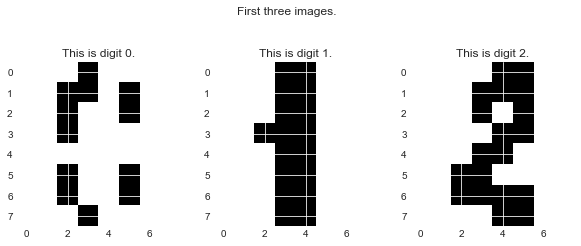

In [31]:
f, ax = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].imshow(X.iloc[i].values.reshape(8,8))
    ax[i].set_title(f"This is digit {y[i]}.")
plt.suptitle("First three images.")
plt.show()

Split data into train and test, let test size be 30% of the dataset and fix random state to 42:

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42) ## your code here

In [33]:
assert y_val.shape[0] == 162
assert y_val.sum() == 169

Fit a RandomForestClassifier with max_depth=13 and evaluate it's performance:

In [34]:
clf = RandomForestClassifier(max_depth=13, random_state=42)

# your code here
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
acc = accuracy_score(y_true=y_val, y_pred=y_pred)
print(acc)

0.9938271604938271


In [35]:
assert acc > 0.98

Now we will use Boruta to find redundand pixels. If the package is not installed in your system, uncomment and run the following cell.

In [36]:
#! pip install boruta

In [37]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestClassifier(max_depth=13),
                         n_estimators='auto',
                         verbose=0,
                         max_iter=100,
                         random_state=42)

# your code here: do run the boruta
feat_selector.fit(np.array(X_train), np.array(y_train));


In [38]:
print('Selected', feat_selector.n_features_, "features of", X_train.shape[1])
print("Used features: ", X_train.columns[feat_selector.support_].tolist())

Selected 31 features of 64
Used features:  ['pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_1_2', 'pixel_1_5', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_7_2', 'pixel_7_3', 'pixel_7_5', 'pixel_7_6']


Let us print redundant pixels as a mask. Does the result looks similar to mine (or to Among us chracters)? 

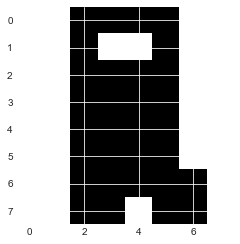

In [39]:
mask = np.array(feat_selector.support_).reshape(8,8)
plt.imshow(mask);

At the end let us redo  classification but only with selected features

In [40]:
clf = RandomForestClassifier(max_depth=13, random_state=42)
# your code here
clf.fit(feat_selector.transform(np.array(X_train)), y_train)
acc = accuracy_score(y_true=y_val, y_pred=clf.predict(feat_selector.transform(np.array(X_val)) ))
# your code here
print(acc)

0.9938271604938271


In [41]:
assert acc > 0.99

###### <font color='red'>Мои мысли</font>
* Улучшения за счёт использования BorutaPy не произошло. Скорее всего из-за неудачно подобранного датасета, в которм убраны "полутона" и много нулей в некоторых полях, поэтому эти поля и не оказывают никакого влияния на результат, а следовательно RandomForestClassifier и так выдаёт очень высокий accuracy_score. Можно, конечно, подобрать random_state так, чтобы было заметно улучшение, но это нарушит чистоту нашего эксперимента. Поэтому просто отметим, что в нашем случае, большее влияние оказывает параметр random_state, при изменении которого может произойти небольшое увеличение или уменьшение accuracy_score


# Materials & References

1. General article about feature engineering and selection (main reference):
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic06_features_regression/topic6_feature_engineering_feature_selection.ipynb

2. Feature engineering/preprocessing, using scikit-learn API (great code examples, but really brief explanation):    
https://scikit-learn.org/stable/modules/preprocessing

3. Feature scaling/normalization:     
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

4. Log Transform/power transform:    
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

6. Missing values preprocessing using scikit-learn API (great code examples, great explanation):    
https://scikit-learn.org/stable/modules/impute.html

7. Feature selection scikit-learn API (great code examples, great explanation):   
https://scikit-learn.org/stable/modules/feature_selection.html

8. Melbourne housing dataset source:    
https://www.kaggle.com/anthonypino/melbourne-housing-market